In [1]:
import sys; sys.path.append("..")
from trader.data.binance import Binance
from trader.backtest.pnl import PnL, robust_vol
from trader.strategies.breakout import breakout

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")

In [2]:
b = Binance(test=True)

In [3]:
b.get_account()

asset
BNB       1000.0
BTC          1.0
BUSD     10000.0
ETH        100.0
LTC        500.0
TRX     500000.0
USDT     10000.0
XRP      50000.0
Name: free, dtype: float64

In [24]:
prices = pd.read_csv("daily.csv").pivot(index="CloseTime", columns = "Symbol", values="Close")
prices.index = pd.to_datetime(prices.index)

In [25]:
signals = breakout(prices)

In [26]:
p0 = b.get_account()
cash = 100.0

In [27]:
n = signals.shape[1]
cash_per = cash / n
vol_target = 0.2
daily_risk_target = vol_target / np.sqrt(365)
daily_cash_vol = cash_per * daily_risk_target
instrument_vols = robust_vol(prices)
positions = daily_cash_vol / instrument_vols

In [28]:
price_ret = prices.diff().last("15M")
positions = positions.reindex(signals.index, method="pad")
positions = positions*signals
positions = positions.reindex(price_ret.index, method="pad")

pnls = (positions.shift(1) * price_ret)

<AxesSubplot:xlabel='CloseTime'>

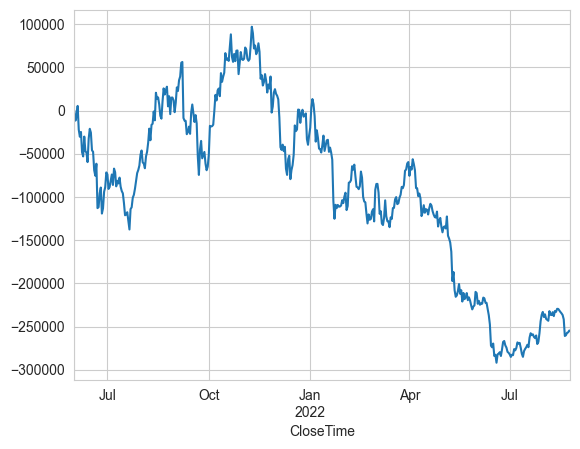

In [29]:
bh_pos = pd.DataFrame(cash/n, index=positions.index, columns = positions.columns)
(bh_pos.shift(1) * price_ret).sum(axis=1).cumsum().plot()

<AxesSubplot:xlabel='CloseTime'>

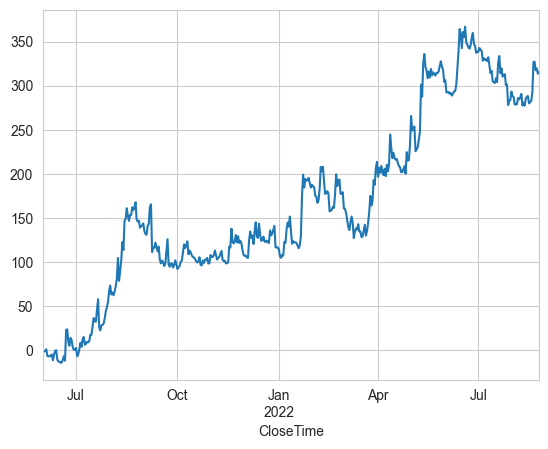

In [30]:
pnls.cumsum().sum(axis=1).plot()

<AxesSubplot:xlabel='CloseTime'>

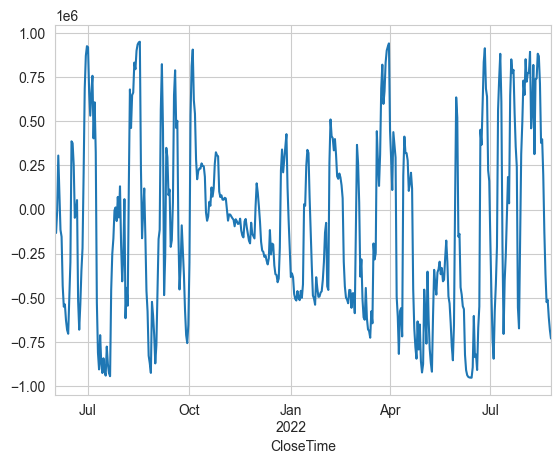

In [31]:
positions.SHIBUSDT.plot()

<AxesSubplot:xlabel='CloseTime'>

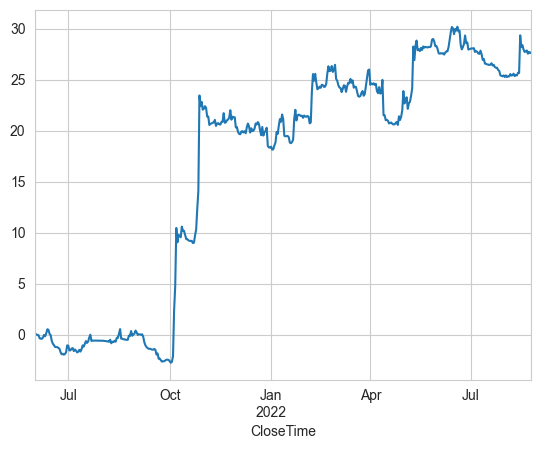

In [33]:
pnls.SHIBUSDT.cumsum().plot()

<AxesSubplot:xlabel='CloseTime'>

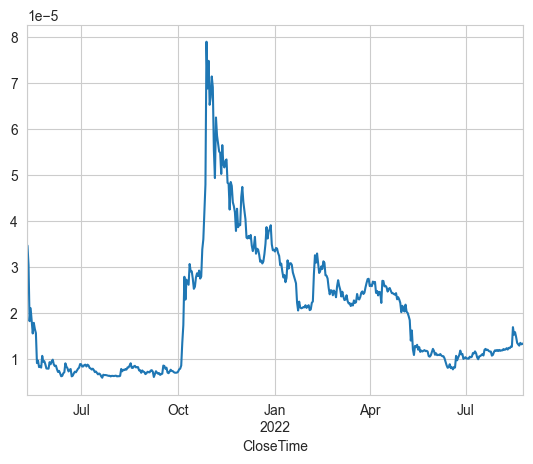

In [32]:
prices.SHIBUSDT.dropna().plot()

In [32]:
days = pd.date_range("2022-06-01", "2022-08-15")
holdings = pd.DataFrame(0, index=days, columns = positions.columns)
for day in days:
    print(day)
    

2022-06-01 00:00:00
2022-06-02 00:00:00
2022-06-03 00:00:00
2022-06-04 00:00:00
2022-06-05 00:00:00
2022-06-06 00:00:00
2022-06-07 00:00:00
2022-06-08 00:00:00
2022-06-09 00:00:00
2022-06-10 00:00:00
2022-06-11 00:00:00
2022-06-12 00:00:00
2022-06-13 00:00:00
2022-06-14 00:00:00
2022-06-15 00:00:00
2022-06-16 00:00:00
2022-06-17 00:00:00
2022-06-18 00:00:00
2022-06-19 00:00:00
2022-06-20 00:00:00
2022-06-21 00:00:00
2022-06-22 00:00:00
2022-06-23 00:00:00
2022-06-24 00:00:00
2022-06-25 00:00:00
2022-06-26 00:00:00
2022-06-27 00:00:00
2022-06-28 00:00:00
2022-06-29 00:00:00
2022-06-30 00:00:00
2022-07-01 00:00:00
2022-07-02 00:00:00
2022-07-03 00:00:00
2022-07-04 00:00:00
2022-07-05 00:00:00
2022-07-06 00:00:00
2022-07-07 00:00:00
2022-07-08 00:00:00
2022-07-09 00:00:00
2022-07-10 00:00:00
2022-07-11 00:00:00
2022-07-12 00:00:00
2022-07-13 00:00:00
2022-07-14 00:00:00
2022-07-15 00:00:00
2022-07-16 00:00:00
2022-07-17 00:00:00
2022-07-18 00:00:00
2022-07-19 00:00:00
2022-07-20 00:00:00
